In [18]:
import sys
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [16]:
# url = 'https://dataapi.moc.go.th/gis-product-price?product_id=W15034&from_date=2010-01-01&to_date=2020-12-31'
url = 'https://dataapi.moc.go.th/gis-product-prices?product_id=W15034&from_date=2015-01-01&to_date=2020-12-31'

In [17]:
r = requests.get(url)

In [5]:
r

<Response [200]>

In [6]:
df = pd.read_json(url, orient='records')
df

,product_id,product_name,product_desc_en,product_desc_th,category_name,group_name,unit,price_min_avg,price_max_avg,price_list
0,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,"{'date': '2015-01-05T00:00:00', 'price_min': 2..."
1,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,"{'date': '2015-01-06T00:00:00', 'price_min': 2..."
2,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,"{'date': '2015-01-07T00:00:00', 'price_min': 2..."
3,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,"{'date': '2015-01-08T00:00:00', 'price_min': 2..."
4,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,"{'date': '2015-01-09T00:00:00', 'price_min': 2..."
...,...,...,...,...,...,...,...,...,...,...
1448,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,"{'date': '2020-12-24T00:00:00', 'price_min': 2..."
1449,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,"{'date': '2020-12-25T00:00:00', 'price_min': 2..."
1450,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,"{'date': '2020-12-28T00:00:00', 'price_min': 2..."
1451,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,"{'date': '2020-12-29T00:00:00', 'price_min': 2..."


In [8]:
df.columns

Index(['product_id', 'product_name', 'product_desc_en', 'product_desc_th',
       'category_name', 'group_name', 'unit', 'price_min_avg', 'price_max_avg',
       'price_list'],
      dtype='object')

In [9]:
# df['price_list'].apply(pd.Series)
final_data = pd.concat([df.drop(['price_list'], axis=1), df['price_list'].apply(pd.Series)], axis=1)
final_data

,product_id,product_name,product_desc_en,product_desc_th,category_name,group_name,unit,price_min_avg,price_max_avg,date,price_min,price_max
0,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,2015-01-05T00:00:00,26.0,27.0
1,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,2015-01-06T00:00:00,26.0,27.0
2,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,2015-01-07T00:00:00,26.0,27.0
3,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,2015-01-08T00:00:00,26.0,27.0
4,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,2015-01-09T00:00:00,26.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,2020-12-24T00:00:00,28.0,33.0
1449,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,2020-12-25T00:00:00,28.0,33.0
1450,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,2020-12-28T00:00:00,28.0,33.0
1451,W15034,มะขามเปียก - ไม่แกะเมล็ด,NaN,NaN,ขายส่ง,พืชอาหาร,บาท/ กก.,29.326222,33.082588,2020-12-29T00:00:00,28.0,33.0


In [10]:
feature = final_data[['date','product_name', 'category_name', 'group_name', 'unit','price_min', 'price_max']]
# feature = product_price[['date' ,'price_min','price_max']]
feature

,date,product_name,category_name,group_name,unit,price_min,price_max
0,2015-01-05T00:00:00,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
1,2015-01-06T00:00:00,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
2,2015-01-07T00:00:00,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
3,2015-01-08T00:00:00,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
4,2015-01-09T00:00:00,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
...,...,...,...,...,...,...,...
1448,2020-12-24T00:00:00,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0
1449,2020-12-25T00:00:00,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0
1450,2020-12-28T00:00:00,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0
1451,2020-12-29T00:00:00,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0


In [11]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1453 non-null   object 
 1   product_name   1453 non-null   object 
 2   category_name  1453 non-null   object 
 3   group_name     1453 non-null   object 
 4   unit           1453 non-null   object 
 5   price_min      1453 non-null   float64
 6   price_max      1453 non-null   float64
dtypes: float64(2), object(5)
memory usage: 79.6+ KB


In [13]:
feature['date'] = pd.to_datetime(feature['date'], format='%Y-%m-%d', errors='coerce')
feature

<ipython-input-13-7d610d963451>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['date'] = pd.to_datetime(feature['date'], format='%Y-%m-%d', errors='coerce')


,date,product_name,category_name,group_name,unit,price_min,price_max
0,2015-01-05,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
1,2015-01-06,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
2,2015-01-07,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
3,2015-01-08,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
4,2015-01-09,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
...,...,...,...,...,...,...,...
1448,2020-12-24,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0
1449,2020-12-25,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0
1450,2020-12-28,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0
1451,2020-12-29,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0


In [14]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1453 non-null   datetime64[ns]
 1   product_name   1453 non-null   object        
 2   category_name  1453 non-null   object        
 3   group_name     1453 non-null   object        
 4   unit           1453 non-null   object        
 5   price_min      1453 non-null   float64       
 6   price_max      1453 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 79.6+ KB


In [21]:
feature = feature.set_index('date')

In [22]:
feature


,product_name,category_name,group_name,unit,price_min,price_max
date,,,,,,
2015-01-05,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
2015-01-06,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
2015-01-07,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
2015-01-08,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
2015-01-09,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0
...,...,...,...,...,...,...
2020-12-24,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0
2020-12-25,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0
2020-12-28,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0


In [23]:
feature.index

DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14',
               '2015-01-15', '2015-01-16',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-25', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='date', length=1453, freq=None)

In [24]:
# Add columns with year, month, and weekday name
feature['Year'] = feature.index.year
feature['Month'] = feature.index.month
feature['Weekday Name'] = feature.index.day_name()
# Display a random sampling of 5 rows
feature.sample(5, random_state=0)

,product_name,category_name,group_name,unit,price_min,price_max,Year,Month,Weekday Name
date,,,,,,,,,
2020-07-30,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,30.0,35.0,2020,7,Thursday
2016-12-26,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,55.0,65.0,2016,12,Monday
2020-05-25,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,25.0,30.0,2020,5,Monday
2016-02-10,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,29.0,31.0,2016,2,Wednesday
2016-02-23,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,29.0,31.0,2016,2,Tuesday


In [25]:
feature['medians'] =feature[['price_min', 'price_max']].median(axis=1)


In [26]:
feature

,product_name,category_name,group_name,unit,price_min,price_max,Year,Month,Weekday Name,medians
date,,,,,,,,,,
2015-01-05,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0,2015,1,Monday,26.5
2015-01-06,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0,2015,1,Tuesday,26.5
2015-01-07,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0,2015,1,Wednesday,26.5
2015-01-08,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0,2015,1,Thursday,26.5
2015-01-09,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,26.0,27.0,2015,1,Friday,26.5
...,...,...,...,...,...,...,...,...,...,...
2020-12-24,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0,2020,12,Thursday,30.5
2020-12-25,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0,2020,12,Friday,30.5
2020-12-28,มะขามเปียก - ไม่แกะเมล็ด,ขายส่ง,พืชอาหาร,บาท/ กก.,28.0,33.0,2020,12,Monday,30.5


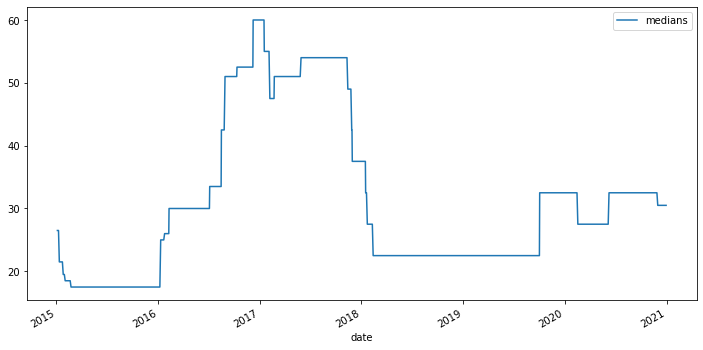

In [27]:
ax = feature.plot( y='medians', figsize=(12,6))

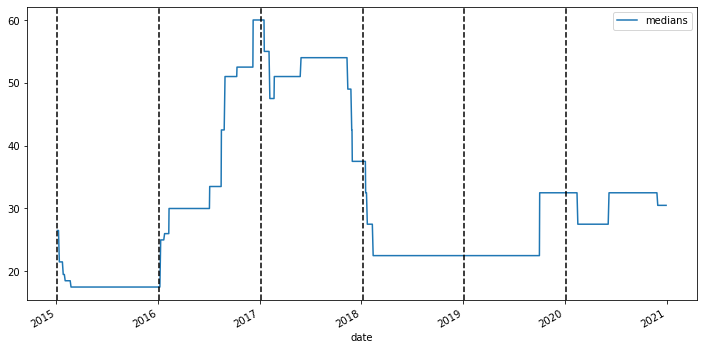

In [28]:
ax = feature.plot( y='medians', figsize=(12,6))
xcoords = ['2015-01-05', '2016-01-05','2017-01-05', '2018-01-05', '2019-01-05', '2020-01-05']
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

In [29]:
feature['Year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

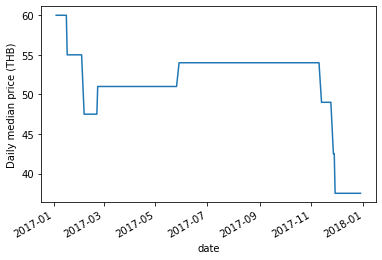

In [30]:
ax = feature.loc['2017', 'medians'].plot()
ax.set_ylabel('Daily median price (THB)');

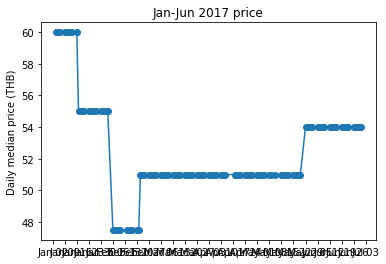

In [34]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(feature.loc['2017-01':'2017-06', 'medians'], marker='o', linestyle='-')
ax.set_ylabel('Daily median price (THB)')
ax.set_title('Jan-Jun 2017 price')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

<AxesSubplot:xlabel='Year', ylabel='medians'>

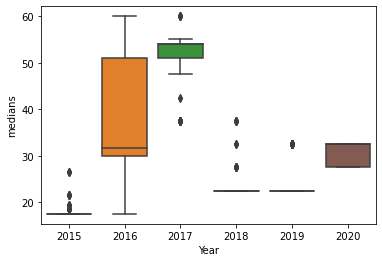

In [37]:
sns.boxplot(data=feature, x='Year', y='medians')

<AxesSubplot:xlabel='Month', ylabel='medians'>

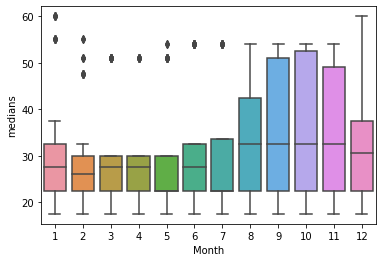

In [38]:
sns.boxplot(data=feature, x='Month', y='medians')

<AxesSubplot:xlabel='Weekday Name', ylabel='medians'>

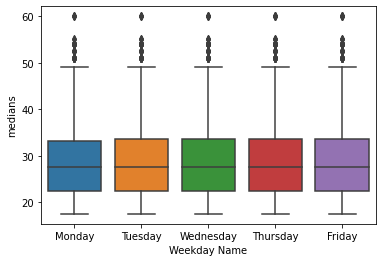

In [39]:
sns.boxplot(data=feature, x='Weekday Name', y='medians')

In [51]:
feature_mean = feature['medians'].resample('W').mean()
feature_mean

date
2015-01-11    26.5
2015-01-18    21.5
2015-01-25    21.5
2015-02-01    19.5
2015-02-08    18.5
              ... 
2020-12-06    30.5
2020-12-13    30.5
2020-12-20    30.5
2020-12-27    30.5
2021-01-03    30.5
Freq: W-SUN, Name: medians, Length: 313, dtype: float64

In [52]:
print(feature.shape[0])
print(feature_mean.shape[0])

1453
313


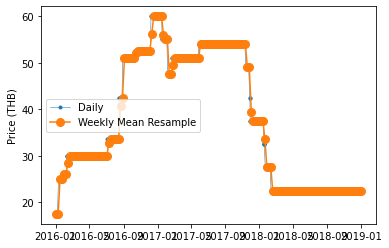

In [56]:
# Start and end of the date range to extract
start, end = '2016-01', '2018-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(feature.loc[start:end, 'medians'],marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(feature_mean.loc[start:end],marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Price (THB)')
ax.legend()